# Plot track density

In [1]:
import huracanpy

## Basic routine

In [2]:
# Load data (example : ibtracs)
tracks = huracanpy.load(tracker = "ibtracs")

/Users/bourdin/Softs/huracanpy/huracanpy/_data/ibtracs.py:90: UserWarning: This offline function loads a light version of IBTrACS which is embedded within the package, based on a file produced manually by the developers.
                  It was last updated on the 24nd May 2024, based on the IBTrACS file at that date.
                  It contains only data from 1980 up to the last year with no provisional tracks. All spur tracks were removed. Only 6-hourly time steps were kept.
  warnings.warn(
/Users/bourdin/Softs/huracanpy/huracanpy/_data/ibtracs.py:96: UserWarning: You are loading the IBTrACS-WMO subset.                       This dataset contains the positions and intensity reported by the WMO agency responsible for each basin
                      Be aware of the fact that wind and pressure data is provided as they are in IBTrACS,                       which means in particular that wind speeds are in knots and averaged over different time periods.
                    For more i

To plot the track density, you need two functions. The first one, `huracanpy.diags.track_density.simple_global_histogram` computes the track density, which is stored in a 2D xarray. The second one `huracanpy.plot.density.plot_density` will plot the track density. Because the track density is a xarray object, you can also use built-in xarray functions.

In [5]:
# Compute track density
D = huracanpy.diags.track_density.simple_global_histogram(tracks.lon, tracks.lat)
D # D, the track density, is a map stored in xarray

<xarray.DataArray (lat: 36, lon: 72)> Size: 21kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 576B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * lat      (lat) float64 288B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5

(<Figure size 432x288 with 2 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

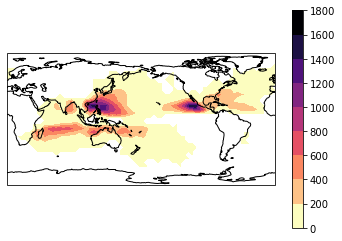

In [7]:
# Plotting using huracanpy function
huracanpy.plot.density.plot_density(D)

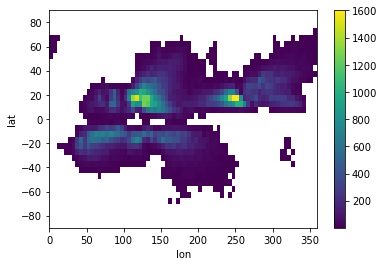

In [16]:
# Plotting using xarray's plot function
D.plot() 

## Customization

### Density computation

For the track density computation, there are two things that can be customized : 
* `bin_size` : The size of the boxes over which the track density is computed, in degrees.
* `N_seasons` is a normalization factor. It is useful to make the number make sense, such as "number of TC point per year in a `bin_size x bin_size` box"

<xarray.DataArray (lat: 180, lon: 360)> Size: 518kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5

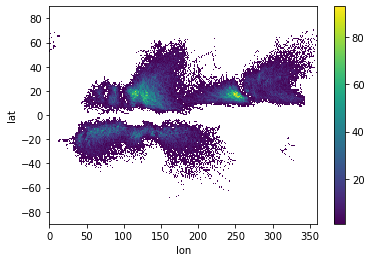

In [18]:
# Setting a smaller bin_size
D = huracanpy.diags.track_density.simple_global_histogram(tracks.lon, tracks.lat, bin_size = 1)
D.plot() 
D

<xarray.DataArray (lat: 18, lon: 36)> Size: 5kB
array([[      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan, 1.000e+00, 3.000e+00,
        2.000e+00,       nan,       nan,       nan,       nan, 1.000e+00,
        1.000e+00,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
...
              nan,       nan,       nan, 3.000e+00, 3.000e+00, 6.000e+00,
        5.200e+01, 6.400e+01, 9.800e+01, 6.400e+01, 6.400e+01, 3.200e+01],
       [6.000e+00, 3.000e+00,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan, 1.000e+00, 9.000e+00, 1.000e+00, 4.000e+00, 9.000e+00,
        7.000e+00,       nan,       nan,       nan, 1.000e+00,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
        1.200e+01, 2.000e+00, 9.000e+00, 2.400e+01, 2.800e+01, 1.500e+01],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan, 1.000e+00],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan]])
Coordinates:
  * lon      (lon) float64 288B 5.0 15.0 25.0 35.0 ... 325.0 335.0 345.0 355.0
  * lat      (lat) float64 144B -85.0 -75.0 -65.0 -55.0 ... 55.0 65.0 75.0 85.0

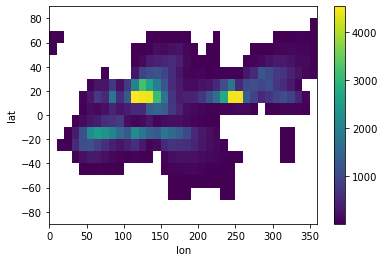

In [20]:
# Setting a larger bin_size
D = huracanpy.diags.track_density.simple_global_histogram(tracks.lon, tracks.lat, bin_size = 10)
D.plot() 
D

42


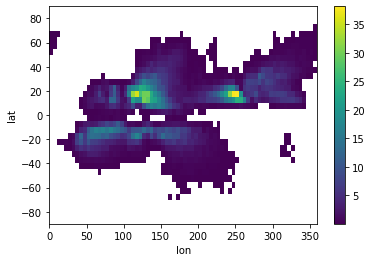

In [31]:
# Normalizing
## Computing the number of season in the dataset
import numpy as np
N = len(np.unique(tracks.season.values))
print(N)
## Track density with normalization. 
D = huracanpy.diags.track_density.simple_global_histogram(tracks.lon, tracks.lat, N_seasons = N)
# In this case, now the number in D in number of TC points in each 5x5 box.
D.plot()

### Plotting

(<Figure size 1080x360 with 2 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

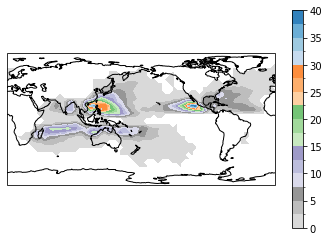

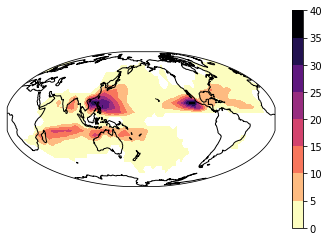

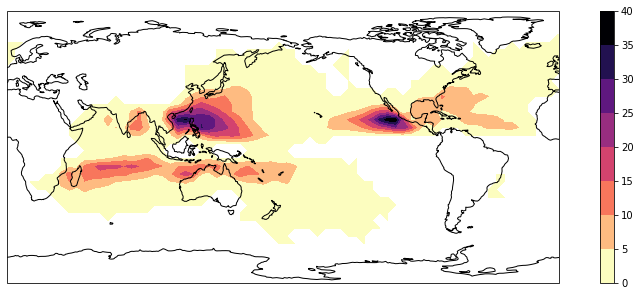

In [44]:
# With huracanpy's function
## The function is based on matplotlib's contourf, so you can use its options
huracanpy.plot.density.plot_density(D, contourf_kws=dict(cmap = "tab20c_r", levels = 20)) 
## Changing the projection with subplot_kws
import cartopy.crs as ccrs
huracanpy.plot.density.plot_density(D, subplot_kws=dict(projection=ccrs.Mollweide(180))) 
## Changing the figure's properties
huracanpy.plot.density.plot_density(D, fig_kws=dict(figsize = (15,5))) 
